In [20]:
from sklearn.decomposition import PCA
import numpy as np
import json

In [3]:
with open("../data/image_features.npy", "rb") as features_npy:
    features = np.load(features_npy)

In [21]:
with open("../data/item_with_images.json", "r") as items_json:
    items = json.load(items_json)

In [22]:
assert features.shape[0] == len(items)

In [44]:
component_nums = [i * 10 for i in range(1, 50)]

In [45]:
from tqdm import tqdm

In [46]:
summed_explained_ratio = []
for c in tqdm(component_nums):
    pca = PCA(n_components = c)
    pca.fit(features)
    summed_explained_ratio.append(sum(pca.explained_variance_ratio_))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:44<00:00,  1.11it/s]


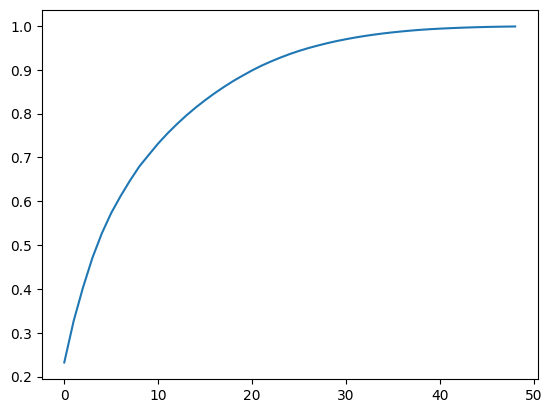

In [48]:
plt.plot(summed_explained_ratio)

In [51]:
pca = PCA(n_components = 0.9, svd_solver = "full")
reduced_features = pca.fit_transform(features)

In [50]:
reduced_features.shape

(3253, 210)

In [26]:
import matplotlib.pyplot as plt
import matplotlib

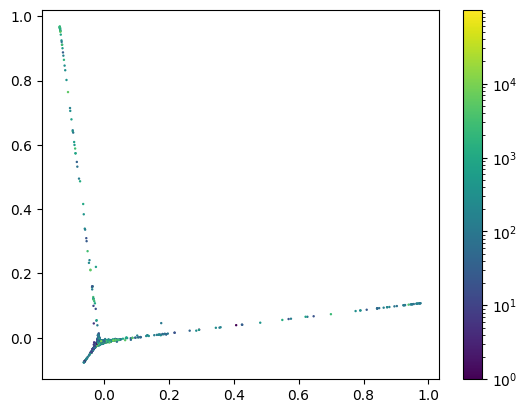

In [31]:
plt.scatter(
    reduced_features[:, 0],
    reduced_features[:, 1],
    c = [item["price"] for item in items],
    s = 3,
    edgecolors='none',
    norm=matplotlib.colors.LogNorm())
plt.colorbar()

In [52]:
with open("../data/reduced_features.npy", "wb") as npy_file:
    np.save(npy_file, reduced_features)